In [1]:
import optimizer_env as st
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline  

env = st.StrOptEnv()

env.reset()

print(env.border_ang*180/np.pi)

29.571314963106314


In [2]:
solution = env.geometry_optimize()
print(solution)

arm = np.sqrt((solution.x[2] - env.KPLX)**2 + (solution.x[3] - env.KPLY)**2)

angle = np.arctan2(solution.x[3] - env.KPLY, solution.x[2] - env.KPLX)
print('ARM: ',arm)
print('Angle: ',angle*180/np.pi)

     fun: 0.3201744194205239
     jac: array([-0.00144058, -0.00237196,  0.01342832,  0.00144754])
 message: 'Optimization terminated successfully.'
    nfev: 227
     nit: 29
    njev: 29
  status: 0
 success: True
       x: array([ -98.78605346, -196.2155592 , -435.83574815, -103.65469366])
ARM:  104.61797908614749
Angle:  -82.21881462393466


total reward after episode:  0.0
error:  0.3201744194205239
[ 0.          0.6686218   1.33399483  1.99626527  2.65557303  3.31205209
  3.96583095  4.61703298  5.26577671  5.91217615  6.55634111  7.1983774
  7.83838708  8.47646872  9.11271758  9.74722579 10.38008257 11.01137434
 11.64118495 12.26959575 12.89668579 13.52253191 14.14720887 14.77078949
 15.39334469 16.01494369 16.635654   17.2555416  17.87467095 18.49310514
 19.11090589 19.7281337  20.34484785 20.96110653 21.57696684 22.19248488
 22.80771582 23.42271393 24.03753262 24.65222453 25.26684156 25.88143489
 26.49605505 27.11075196 27.72557496 28.34057286 28.95579398 29.57131496]
58.3568880849749


C:\Users\asus_strix_scar\Anaconda3\lib\site-packages\gym\logger.py:30: UserWarning: WARN: You are calling 'step()' even though this environment has already returned done = True. You should always call 'reset()' once you receive 'done = True' -- any further steps are undefined behavior.
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


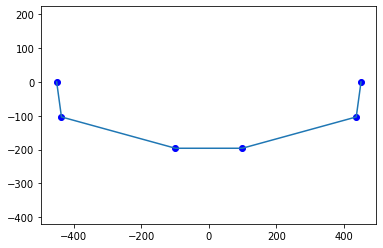

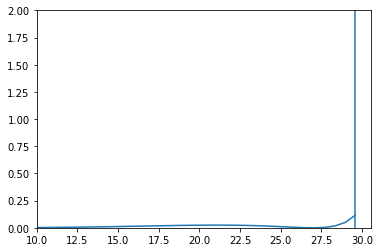

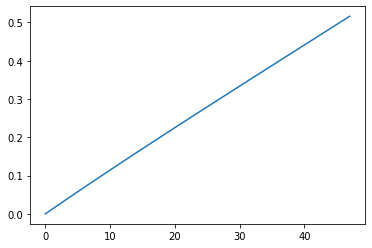

In [3]:
val = solution.x
#val = env.state

plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY], 'bo')
plt.plot([env.KPLX, val[2], val[0], -val[0], -val[2], -env.KPLX], [env.KPLY, val[3], val[1], val[1], val[3], env.KPLY])
plt.axis('equal')

env.state = solution.x

env.step(0)

print('error: ', env.error)

plt.figure()
plt.plot(env.check_r*180/np.pi, env.check_error*180/np.pi)
plt.axvline(x=env.border_ang / np.pi * 180)
plt.axis([10, (env.border_ang / np.pi * 180) + 1, 0, 2])

print(env.check_r*180/np.pi)
print(env.rack_travel)

plt.figure()
plt.plot(env.check_r)

In [4]:
print(env.reset())

for i in range(env.action_space.n):
    print(env.step(i))
    print(env.error)


#reward = np.array([])

total_reward = 0

actions = []


[-113.88696069 -205.96202507 -424.57451095  -80.51404866]
(array([-113.88696069, -205.96202507, -424.57451095,  -80.51404866]), 0.0, False, {})
3.118035038161316
(array([-114.88696069, -205.96202507, -424.57451095,  -80.51404866]), -0.01, False, {})
3.1169428010366937
(array([-113.88696069, -205.96202507, -424.57451095,  -80.51404866]), 0.01, False, {})
3.118035038161316
(array([-113.88696069, -206.96202507, -424.57451095,  -80.51404866]), -0.01, False, {})
3.1250686320755965
(array([-113.88696069, -205.96202507, -424.57451095,  -80.51404866]), 0.01, False, {})
3.118035038161316


In [ ]:
for k in range (20):
    env.reset()
    total_reward = 0
    actions = []
    for i in range(200):
        #act = 5
        act = np.random.randint(0,9)
        
        actions.append(act)
        #valami = env.reset()
        #env.reset()            
        val = env.step(act)
        #print('reward: ',val[1])
        
        total_reward += val[1]
        
    #valami = env.step(act)[0]
    #env.save_plot(env.check_error, env.check_r)
    #plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
    #plt.show
    #print(i,'error_mod' , env.check_error)
    #print(i,'r_array_mod', env.check_r)

    #plt.show()

    print(env.state)

    print(env.rack_travel)
    print('total_reward: ', total_reward)
    
    plt.plot(np.sort(np.asarray(actions), axis=None))
    
    plt.figure()
    
    plt.plot(total_reward, 'bo')
    



In [ ]:
print(env.check_error)
print(env.check_r)

print(np.trapz(env.check_error, env.check_r))

plt.plot(env.check_r)

print(env.border_ang)

In [ ]:
print(env.state)
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
env.step(2)[0]
#plt.plot([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])
print([env.KPLX, env.state[2], env.state[0], -env.state[0]], [env.KPLY, env.state[3], env.state[1], env.state[1]])

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

#plt.plot(env.b0_array + env.KPLX, env.b1_array + env.KPLY)
#plt.plot(env.b2_array + env.KPLX, env.b3_array + env.KPLY)
#plt.plot(env.b4_array + env.KPLX, env.b5_array)
#plt.plot(env.b6_array + env.KPLX, env.b7_array)

#plt.plot([env.KPLX, env.Ax0, env.Dx, -env.Dx], [env.KPLY, env.Ay0, env.Dy, env.Dy])
#plt.plot(env.z_array, env.b1_array/np.pi*180)
#plt.plot(np.flip(env.z_array, 0), env.r_array/2/np.pi*180)
plt.plot(reward)
#plt.axis('equal')
plt.show()

In [ ]:
plt.plot(env.x_array, env.r_array/np.pi*180)
plt.plot(env.x_array, env.l_array/np.pi*180)
plt.plot(env.x_array, env.k_array/np.pi*180)


In [ ]:
print(env.k_array[0]/np.pi*180)
print(env.r_array[0]/np.pi*180)

In [ ]:
env.k_array

In [ ]:
plt.plot(env.r_array, (env.l_array - env.r_array))
plt.plot(env.r_array, (env.k_array - env.r_array))

In [ ]:
plt.plot(env.r_array, ((env.k_array - env.l_array)**2))

In [ ]:
env.tr_eval

In [ ]:
env.error

In [ ]:
import timeit
import numpy as np

start = timeit.default_timer()

o = np.empty([])
oo = np.empty([])

i = 1
for i in range(100):
    env.step(-100 + 2*i)
    o = np.append(o, env.error)
    oo = np.append(oo, env.error_orig)
    
    plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
    plt.axvline(x=env.border_ang/np.pi*180)
    i += 1
    
stop = timeit.default_timer()
print('Time: ', stop - start)

plt.figure()
plt.plot(o[1:], '.')
plt.plot(oo[1:], '.')




In [ ]:
env.border_ang/np.pi*180

In [ ]:
env.step(0)

In [ ]:
len(env.error_array)

In [ ]:
len(env.r_array)

In [ ]:
np.trapz(env.error_array, env.r_array)

In [ ]:
plt.figure()
plt.plot(env.r_array[0:len(env.error_array)-env.int_chk], o[1:len(env.error_array)-env.int_chk+1], '.')
plt.plot(env.r_array, oo[1:], '.')




In [ ]:
env.int_chk

In [ ]:
plt.plot(env.r_array/np.pi*180, env.error_array/np.pi*180)
plt.axvline(x=env.border_ang/np.pi*180)

In [ ]:
result = {
  'a': lambda x: env.Dx = env.Dx + x,
  'b': lambda x: x + 7,
}['a'](5)

In [ ]:
from scipy.interpolate import interp1d

import numpy as np
x = np.array([0.5156312644066778, 0.526040469557302])
y = np.array([0.007969681162248856, 0.0154360504511115])

f = interp1d(x,y)



In [ ]:
f(0.5161168102504706)